# QCTO - Workplace Module

### Project Title: Vegetable Prices Analysis
#### Done By: Rachel Finlayson

Git hub: https://github.com/RachelFinlayson/Capestone_Project_2025

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

**Purpose:** This project analyzes vegetable prices using a Kaggle dataset.  
The goal is to identify pricing patterns, seasonal fluctuations, and anomalies that could help predict future prices.  
This work contributes to agricultural economics and consumer market research.

**Objectives:** 
* Understand temporal patterns (trends/seasonality) for common vegetables
* Detect missingness/outliers and prepare a clean, analysis-ready dataset
* Create a tidy/long format for comparative visualizations and forecasting later
* Stakeholders: consumers, retailers, and planners interested in price volatility and seasonal effects.

---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details of packages:** 

* Data manipulation: pandas, numpy
* Visualizations: Matplotlib, Seaborn
* Preprocessing & modeling: sklearn
---

In [78]:
# Data manipulation
import pandas as pd
import numpy as np
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Collected from an authorized source (https://agmarknet.gov.in/), the dataset includes information on a wide range of vegetables, detailing prices over time.
* **Details:** 

The dataset was collected from Kaggle and contains daily vegetable price data.  
It includes categorical features (vegetable type, market) and numerical features (price).

* Data source: https://www.kaggle.com/datasets/ksamiksha19/vegetable-prices

---

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

---

In [25]:
df = pd.read_csv("prices.csv") # Importating data saved in same folder as notebook
df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


In [27]:
# Quick missingness summary as double check
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean()*100).round(2).sort_values(ascending=False)
print(missing_pct)

Price Dates               0.0
Bhindi (Ladies finger)    0.0
Tomato                    0.0
Onion                     0.0
Potato                    0.0
Brinjal                   0.0
Garlic                    0.0
Peas                      0.0
Methi                     0.0
Green Chilli              0.0
Elephant Yam (Suran)      0.0
dtype: float64


In [28]:
# Convert date column
df['Price Dates'] = pd.to_datetime(df['Price Dates'], 
                                   format="%d-%m-%Y", errors="coerce")

# Sort by date
df = df.sort_values('Price Dates').reset_index(drop=True)

In [29]:
# Remove exact duplicate rows
before_dups = len(df)
df = df.drop_duplicates()
after_dups = len(df)

print(before_dups, after_dups)

287 287


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [64]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Basic descriptive stats
desc = df[num_cols].describe().T
desc

,count,mean,std,min,25%,50%,75%,max
Bhindi (Ladies finger),287.0,29.444251,8.124815,17.00,22.0,27.5,33.0,60.0
Tomato,287.0,16.006969,0.118056,16.00,16.0,16.0,16.0,18.0
Onion,287.0,20.649826,11.711204,8.00,12.0,16.0,25.0,57.0
Potato,287.0,18.585366,2.726238,12.00,16.0,20.0,20.0,24.0
Brinjal,287.0,31.655052,11.725421,14.00,25.0,30.0,35.0,80.0
Garlic,287.0,133.101045,60.078331,50.00,85.0,120.0,165.0,290.0
Peas,287.0,66.658537,33.302415,22.00,40.0,60.0,80.0,150.0
Methi,287.0,20.383275,117.428417,5.00,8.0,12.0,16.0,2000.0
Green Chilli,287.0,44.122404,12.796590,0.13,35.0,40.0,50.0,90.0
Elephant Yam (Suran),287.0,28.797909,6.607973,12.00,25.0,30.0,30.0,50.0


📊 Descriptive Statistics

Dataset has 287 rows × 11 columns (1 date + 10 vegetables).

Central tendency & spread:

- Tomato prices are very stable: mean ≈ 16, std ≈ 0.12 (almost constant).

- Garlic shows huge variability: mean ≈ 133, std ≈ 60, max = 290.

- Methi has extreme outliers: mean ≈ 20 but max = 2000 (!) → likely data entry issue.

- Peas and Brinjal also have broad distributions (std ≈ 33 and 11.7).

- Bhindi, Onion, Potato, Elephant Yam are moderately variable.

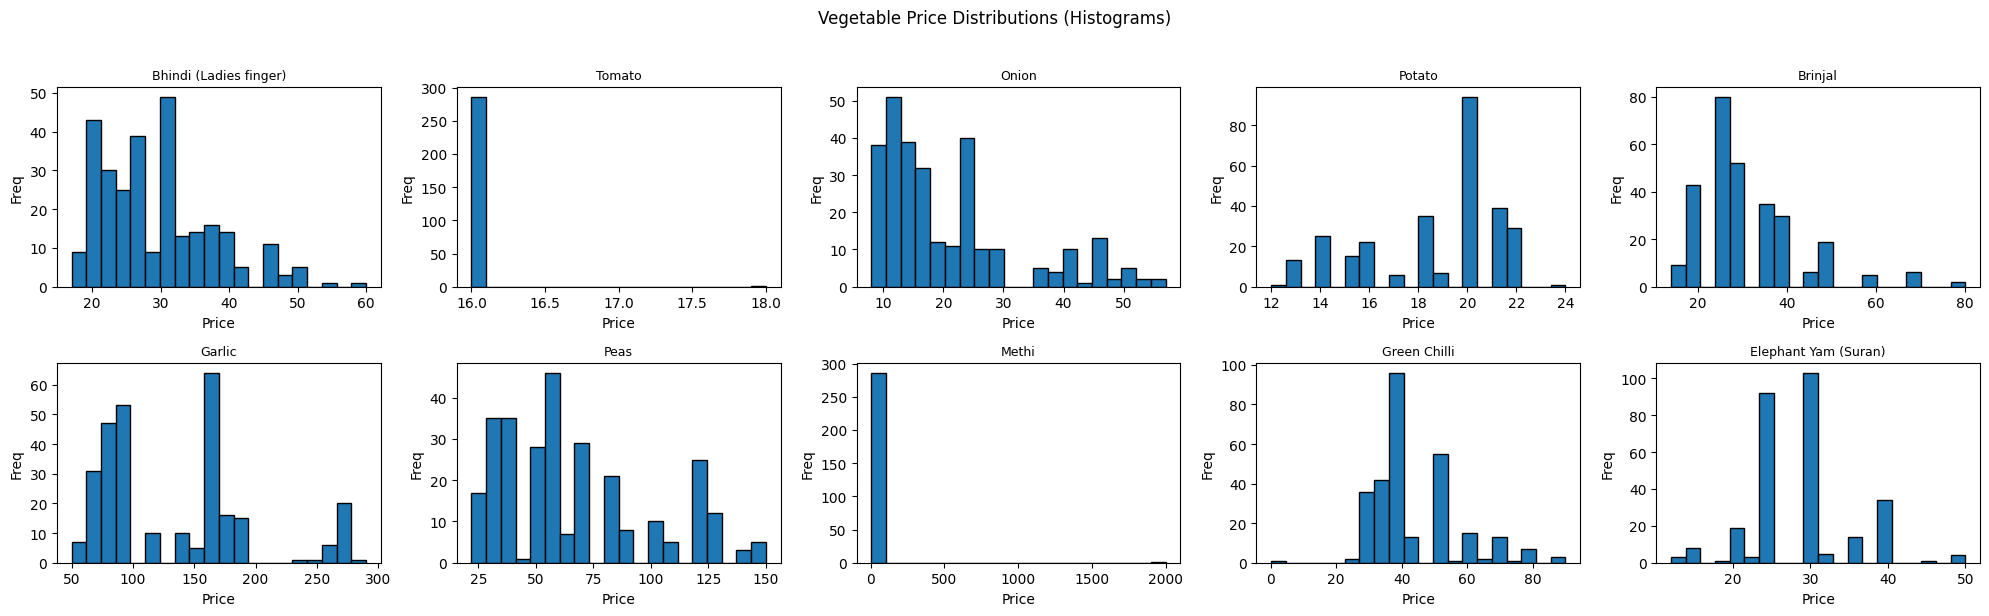

In [65]:
# 1) Histograms in a grid
n = len(num_cols)

# Decide grid size: e.g. 2 rows × 5 cols for 10 veg
cols = min(5, n)                # max 5 columns
rows = math.ceil(n / cols)      # enough rows to fit all variables

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    ax.hist(df[col].dropna(), bins=20, edgecolor="black")
    ax.set_title(col, fontsize=9)
    ax.set_xlabel("Price")
    ax.set_ylabel("Freq")

# Hide any unused axes (if n not perfectly filling grid)
for j in range(i+1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Vegetable Price Distributions (Histograms)", y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

- Bhindi (Ladies finger): Prices are moderately spread (17–60), with clustering between 20–35. Distribution is slightly right-skewed.

- Tomato: Almost constant at 16–18 across all records → very low variability, likely a controlled or stable commodity.

- Onion: Wide variation (8–57) with concentration between 10–20, right-skewed but with some higher outliers.

- Potato: Prices mostly 16–22, with a clear cluster around 20 → low to moderate variability.

- Brinjal: Broader spread (14–80), majority between 25–35, with occasional spikes at higher prices.

- Garlic: Highly variable (50–290). Most common prices 80–160, but a few extreme outliers push the distribution long to the right.

- Peas: Spread across 22–150, majority 40–80. Clear right skew and higher volatility than staples like Onion/Potato.

- Methi: Extremely skewed. While most prices are between 5–20, a handful of entries reach 2000 → almost certainly data entry anomalies.

- Green Chilli: Range 0.1–90, clustering around 30–50. Presence of very low outliers (≈0).

- Elephant Yam (Suran): Prices clustered tightly between 25–35, with smaller counts in 40–50. Moderate variability overall.

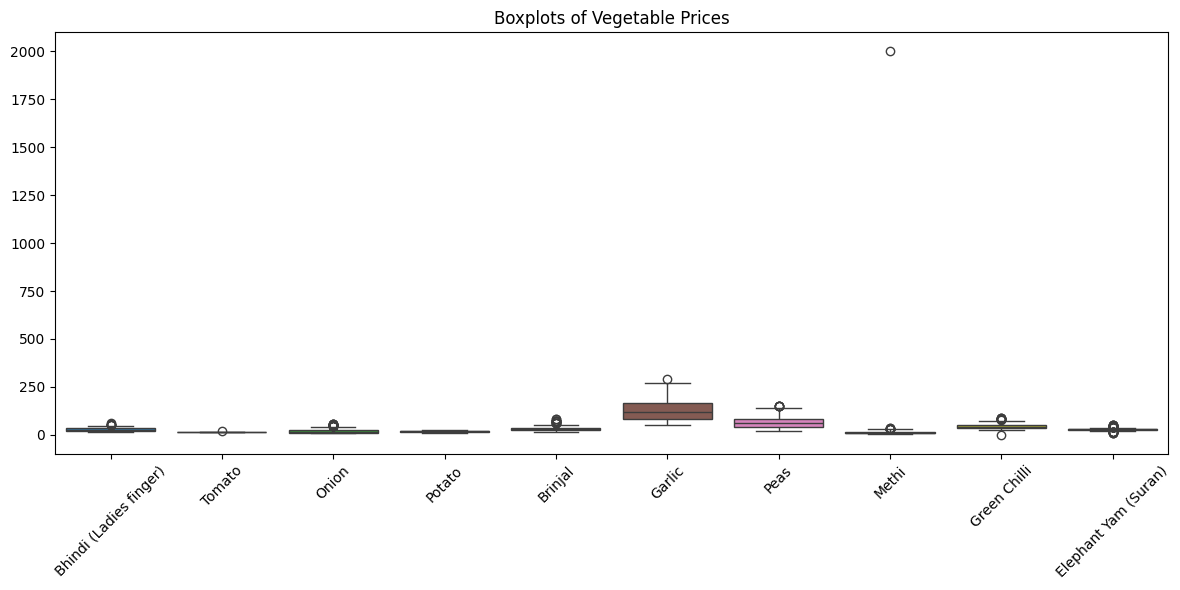

In [66]:

# 2) Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Vegetable Prices")
plt.tight_layout()

- Boxplots show extreme outliers for Methi, Garlic, and Peas.
- Tomato again shows very little spread.

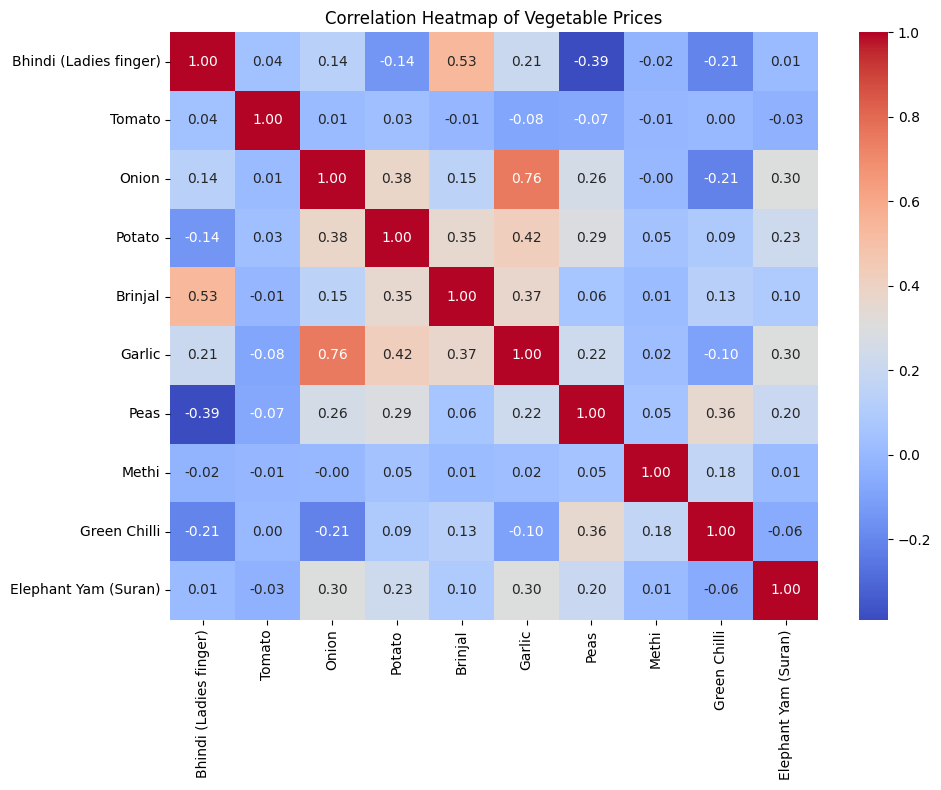

In [67]:

# 3) Correlation heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Vegetable Prices")
plt.tight_layout()


Notable positive correlations:
- Onion ↔ Potato (markets might move similarly).
- Garlic ↔ Peas moderate correlation.

Most others are weak, suggesting diverse price dynamics.

🔎 Significant Findings

Data quality issues: Methi has unrealistic values (2000), needs outlier handling (winsorization or removal).

Market stability: Tomato prices are essentially fixed—could be controlled prices or limited data variation.

Price co-movement: Onion & Potato show related trends, useful for forecasting.

Risky commodities: Garlic, Peas, and Brinjal show wide swings, highlighting supply/demand volatility.

In [68]:
### Time-Series EDA

# Monthly means
monthly_wide = (
    df.set_index("Price Dates")[num_cols]
      .resample("M").mean()
)

# Tidy version
monthly_long = (
    monthly_wide
      .reset_index()
      .melt(id_vars="Price Dates", var_name="vegetable", value_name="price")
)

monthly_wide.head(), monthly_long.head()

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\3518768412.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M").mean()


(             Bhindi (Ladies finger)     Tomato      Onion     Potato  \
 Price Dates                                                            
 2023-01-31                37.882353  16.117647  17.911765  20.529412   
 2023-02-28                35.979167  16.000000  12.187500  14.958333   
 2023-03-31                32.980769  16.000000  11.384615  13.615385   
 2023-04-30                30.229167  16.000000   9.354167  15.500000   
 2023-05-31                21.620000  16.000000  10.680000  20.320000   
 
                Brinjal     Garlic       Peas      Methi  Green Chilli  \
 Price Dates                                                             
 2023-01-31   38.823529  61.176471  25.352941  10.058824     37.352941   
 2023-02-28   32.750000  73.750000  31.041667   8.125000     40.083333   
 2023-03-31   22.153846  79.038462  38.461538   7.192308     45.576923   
 2023-04-30   24.166667  82.291667  67.958333  13.125000     37.922083   
 2023-05-31   24.400000  92.200000  63.0000

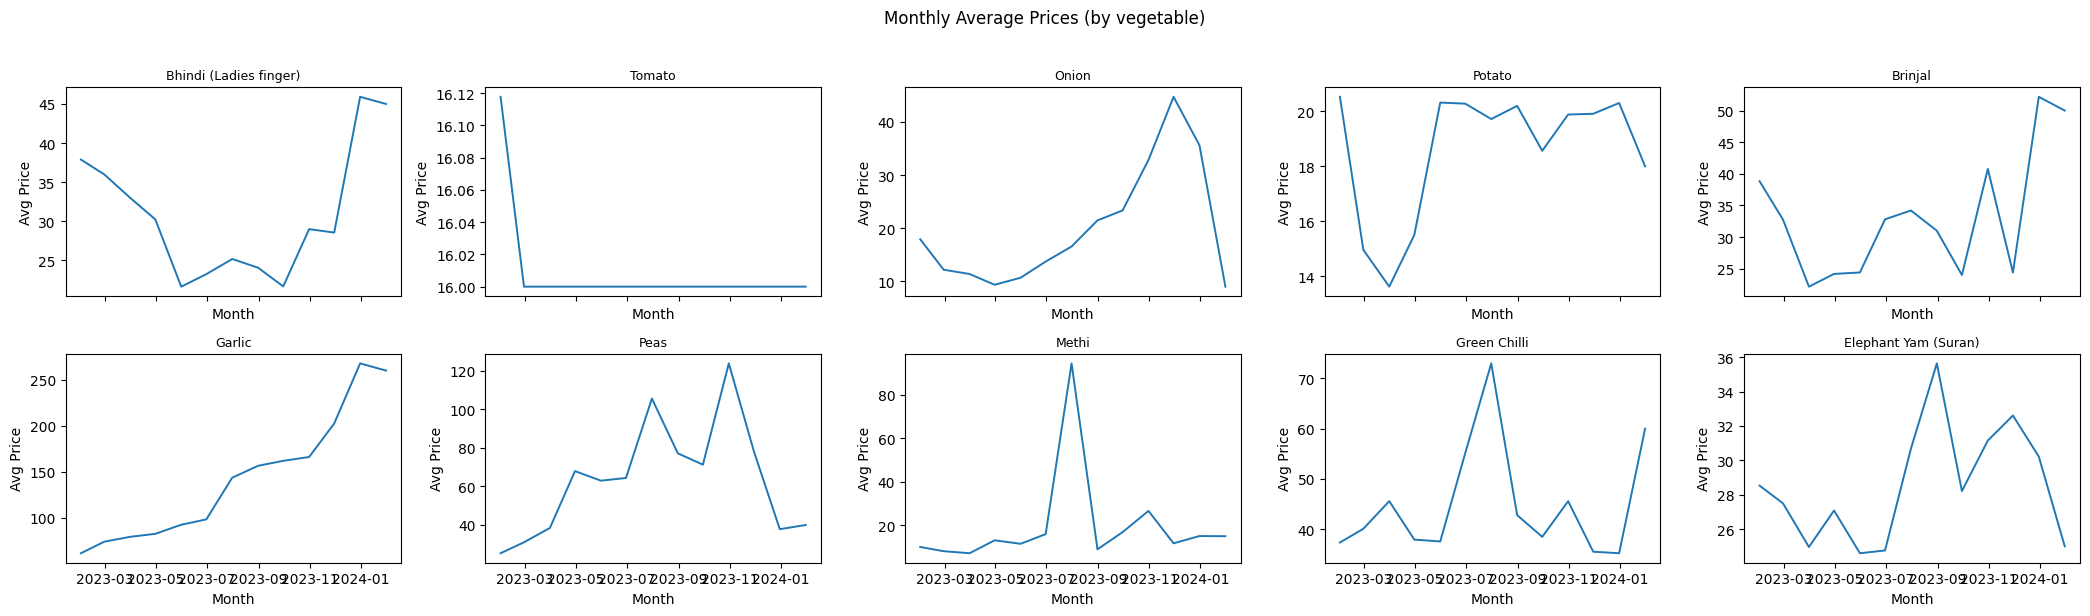

In [69]:
# monthly timelines

n = len(num_cols)
cols = min(5, n)
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4.2*cols, 3.0*rows), sharex=True)
axes = np.atleast_1d(axes).flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    ax.plot(monthly_wide.index, monthly_wide[col], marker="", linewidth=1.4)
    ax.set_title(col, fontsize=9)
    ax.set_xlabel("Month"); ax.set_ylabel("Avg Price")

for j in range(i+1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Monthly Average Prices (by vegetable)", y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

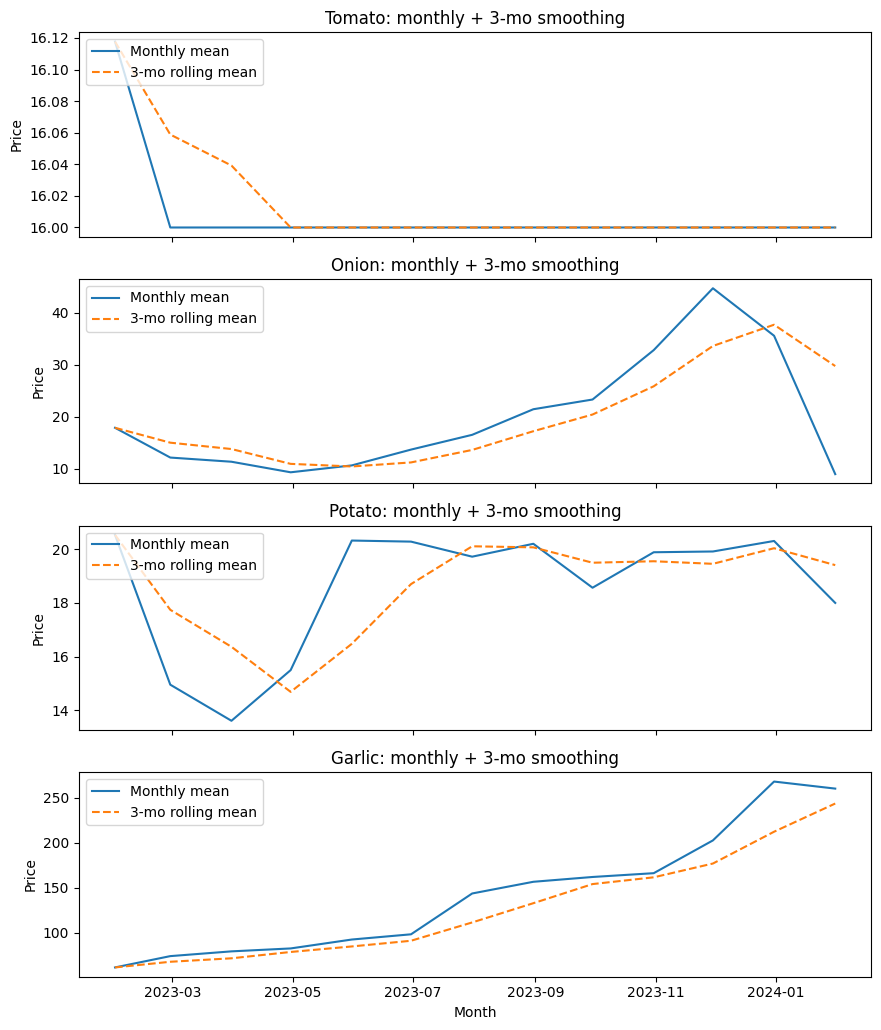

In [70]:
# Rolling 3-month smooting (selected series)
focus = [c for c in ["Tomato", "Onion", "Potato", "Garlic"] if c in monthly_wide.columns]
roll = monthly_wide[focus].rolling(window=3, min_periods=1)

fig, axes = plt.subplots(len(focus), 1, figsize=(9, 2.6*len(focus)), sharex=True)
axes = np.atleast_1d(axes)

for ax, col in zip(axes, focus):
    ax.plot(monthly_wide.index, monthly_wide[col], label="Monthly mean")
    ax.plot(monthly_wide.index, roll.mean()[col], linestyle="--", label="3-mo rolling mean")
    ax.set_title(f"{col}: monthly + 3-mo smoothing")
    ax.set_ylabel("Price")
    ax.legend(loc="upper left")

axes[-1].set_xlabel("Month")
plt.tight_layout()
plt.show()


C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\2116263739.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = monthly_wide[col].asfreq("M")


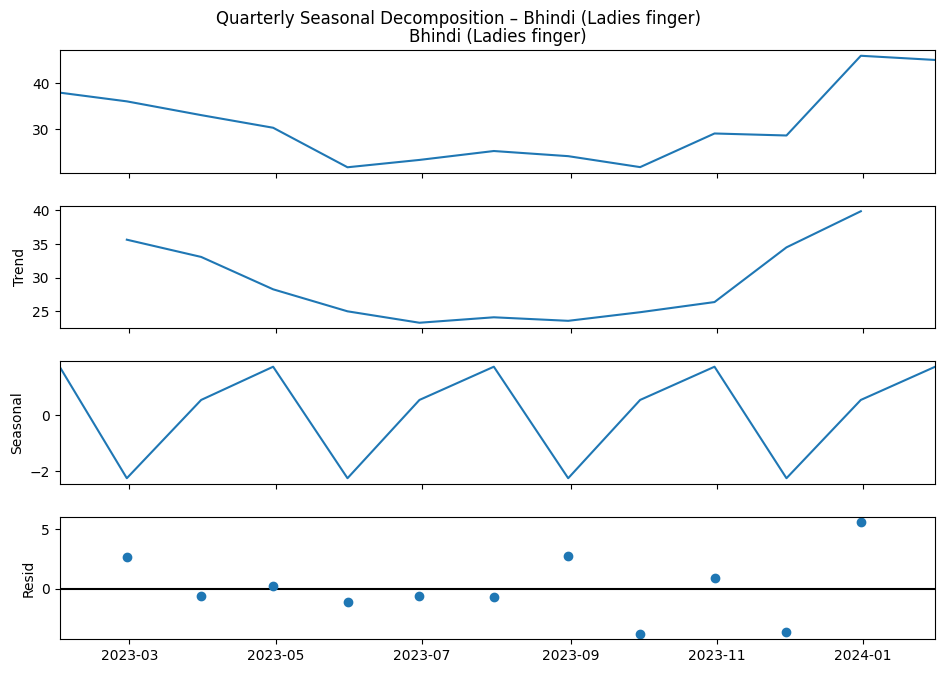

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\2116263739.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = monthly_wide[col].asfreq("M")


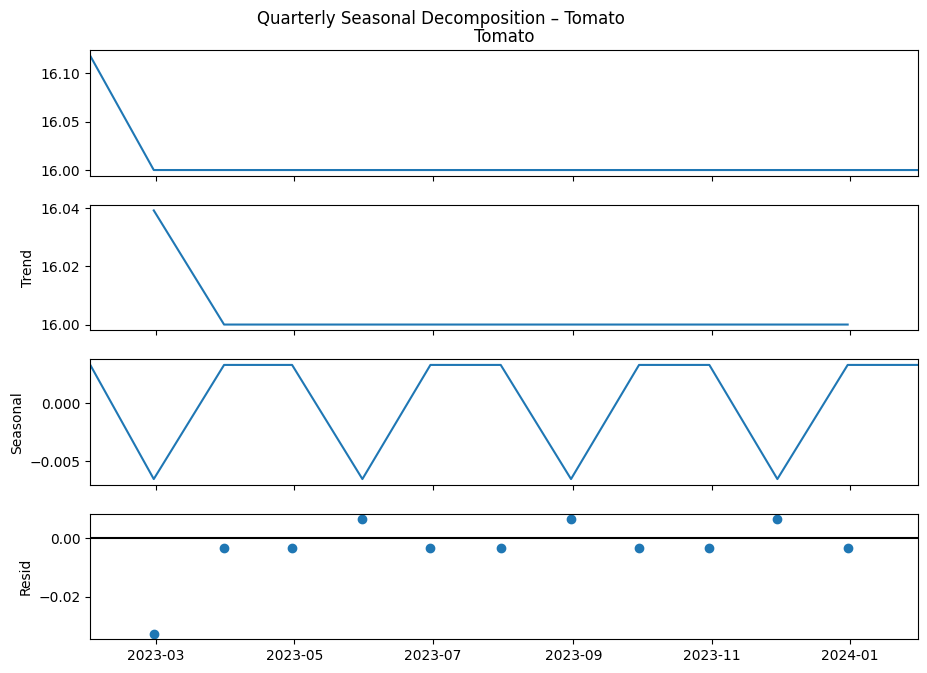

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\2116263739.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = monthly_wide[col].asfreq("M")


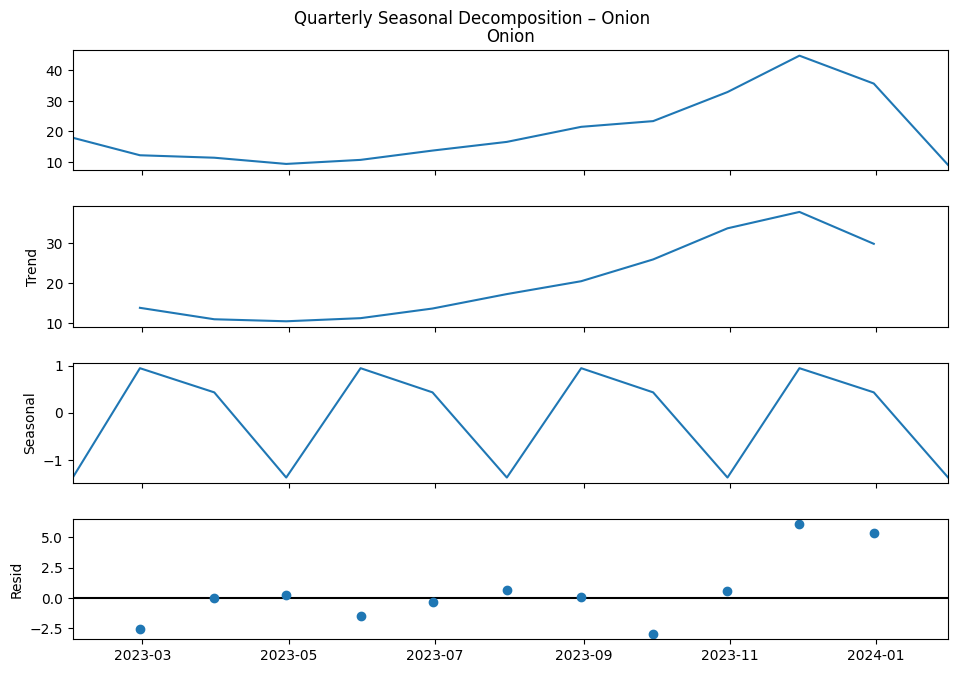

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\2116263739.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = monthly_wide[col].asfreq("M")


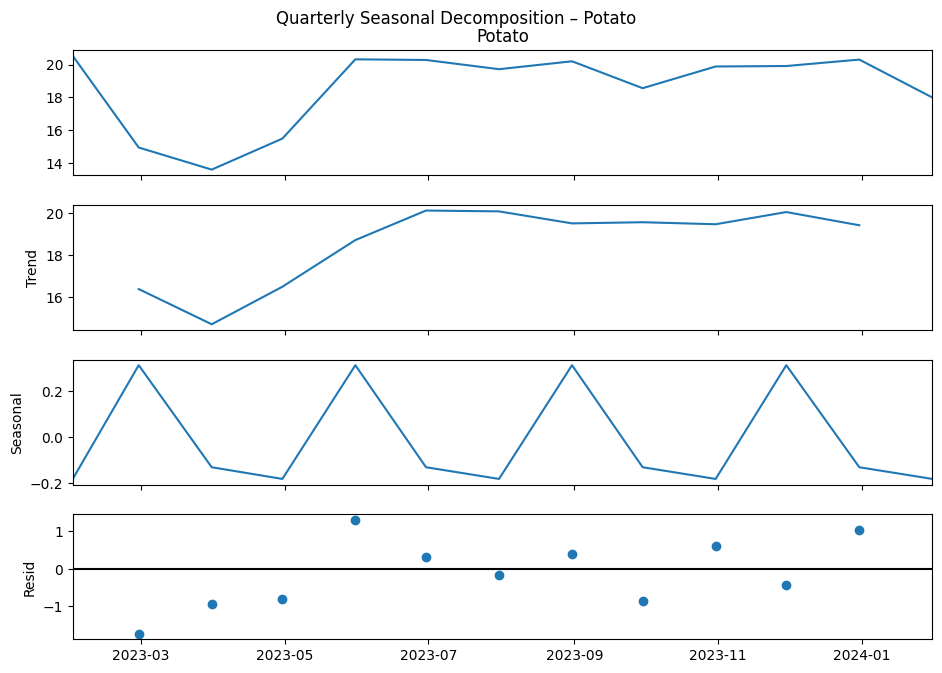

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\2116263739.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = monthly_wide[col].asfreq("M")


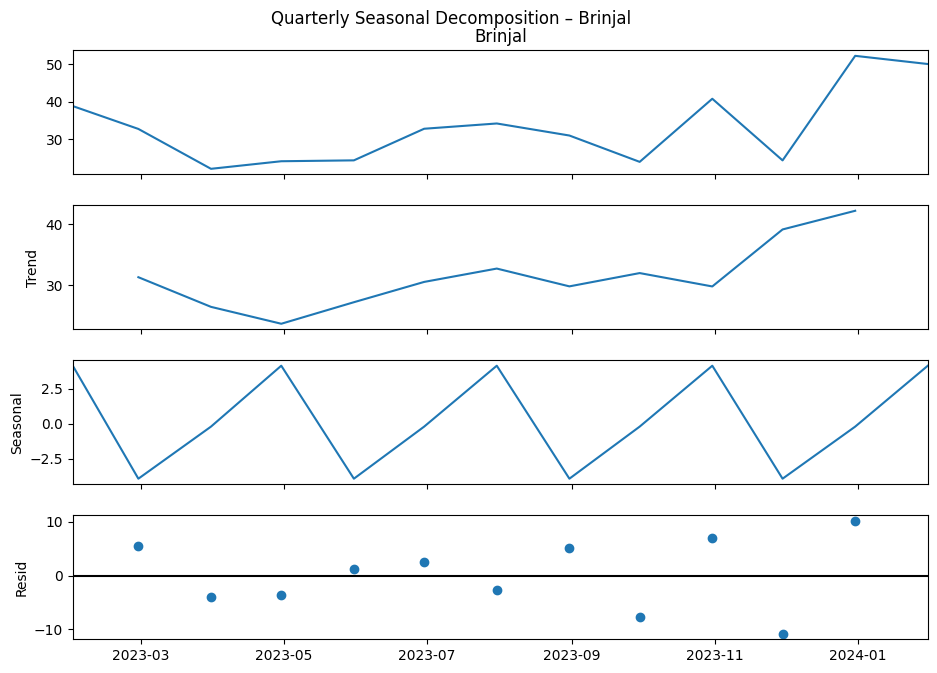

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\2116263739.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = monthly_wide[col].asfreq("M")


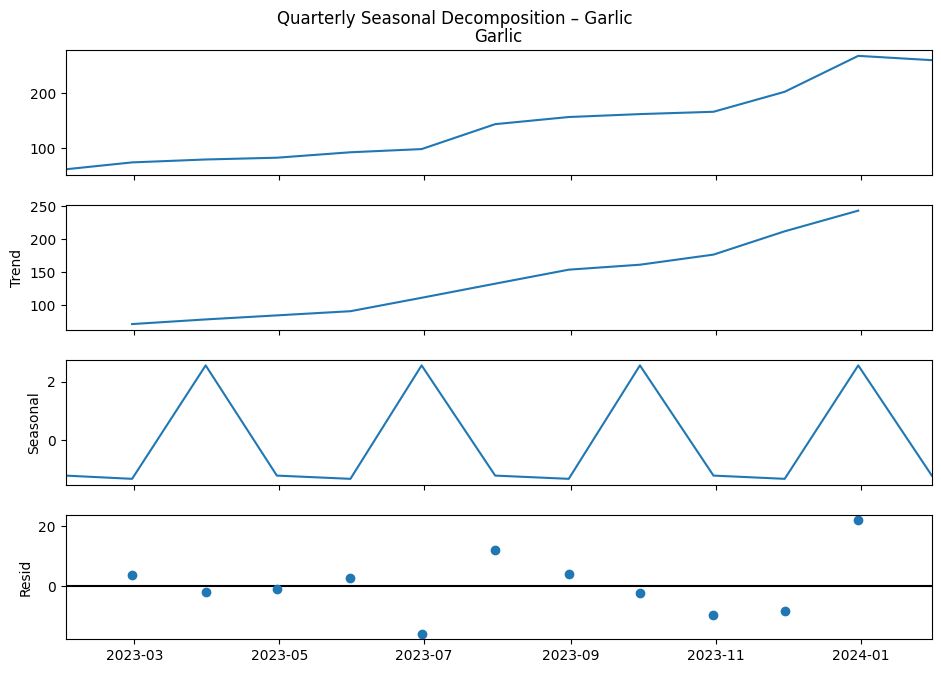

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\2116263739.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = monthly_wide[col].asfreq("M")


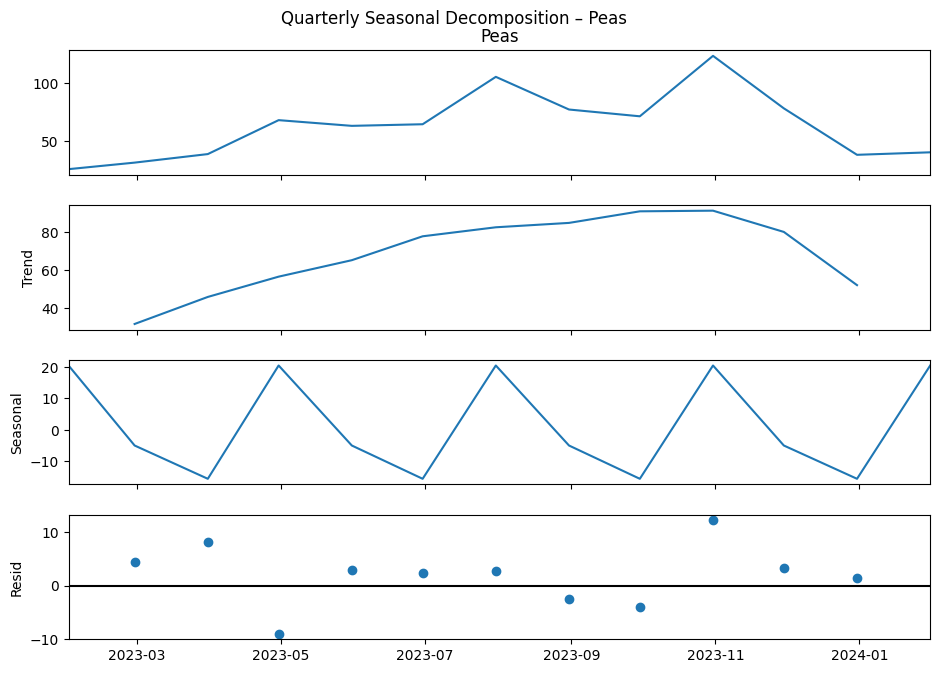

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\2116263739.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = monthly_wide[col].asfreq("M")


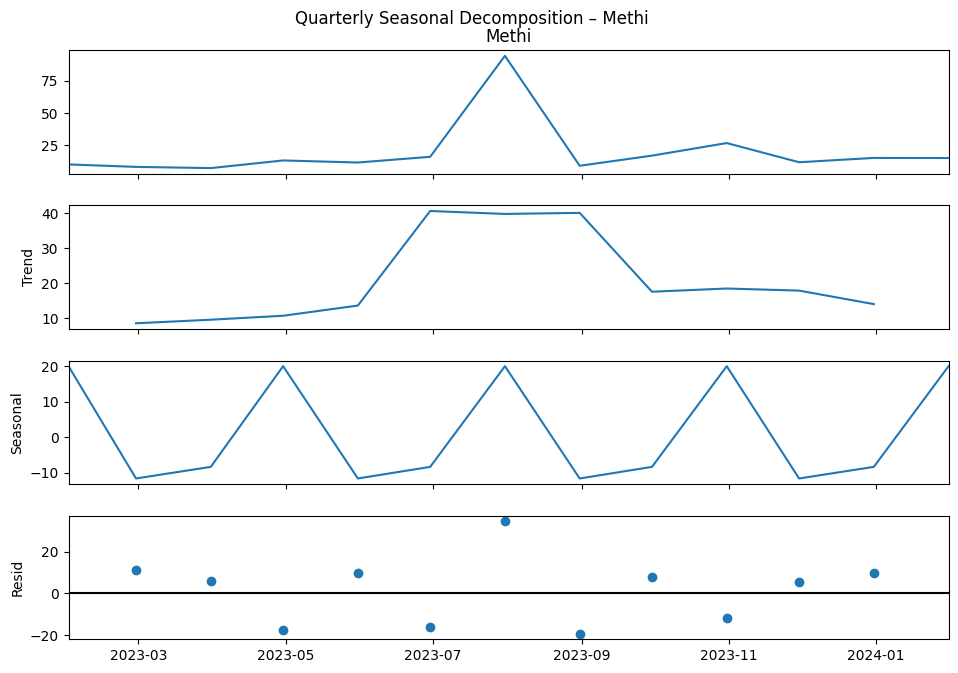

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\2116263739.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = monthly_wide[col].asfreq("M")


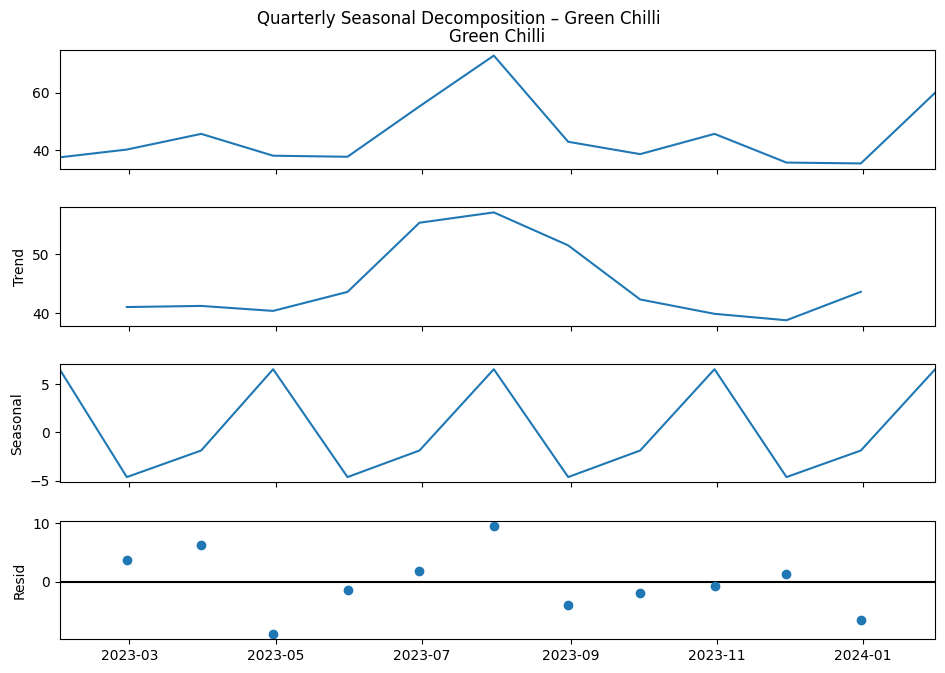

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\2116263739.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = monthly_wide[col].asfreq("M")


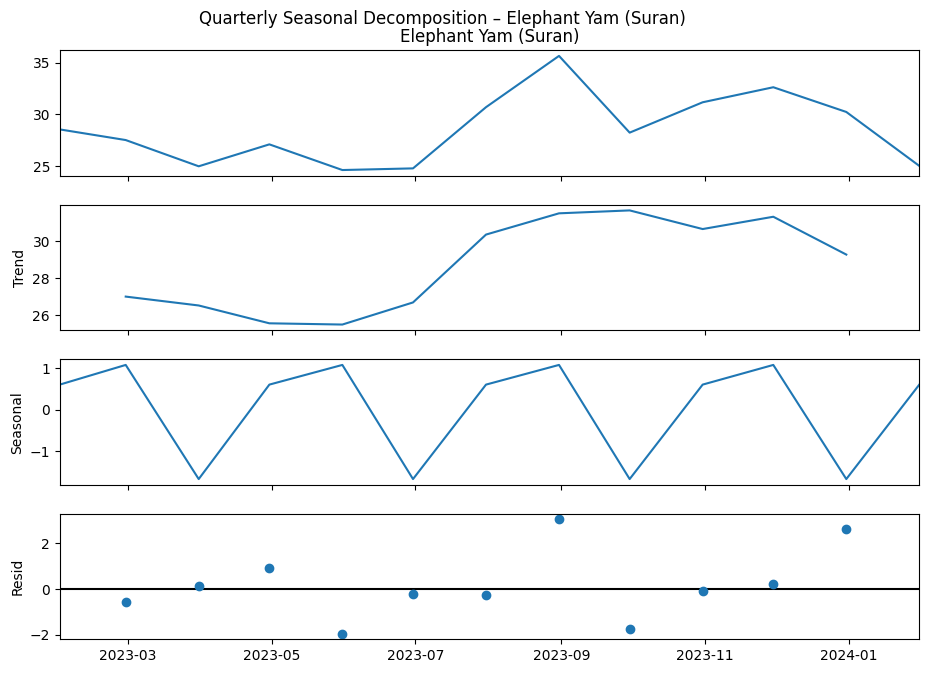

In [73]:
# Seasonal Decomposition & ACF (one series)
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a directory for saving plots (optional)
import os
os.makedirs("decomp_plots", exist_ok=True)

# Loop through each vegetable
for col in monthly_wide.columns:
    ts = monthly_wide[col].asfreq("M")

    # Drop if too few observations
    if ts.dropna().shape[0] < 6:
        print(f"Skipping {col}: not enough data")
        continue

    # Quarterly decomposition (period=3)
    try:
        decomp = seasonal_decompose(ts, model="additive", period=3)
        fig = decomp.plot()
        fig.set_size_inches(10, 7)
        fig.suptitle(f"Quarterly Seasonal Decomposition – {col}", y=0.98)

        # Save each decomposition plot
        fig.savefig(f"decomp_plots/decomp_{col.replace(' ', '_')}.png", dpi=120, bbox_inches="tight")
        plt.show()

    except Exception as e:
        print(f"Could not decompose {col}: {e}")

In [74]:
summary_stats = []

for col in monthly_wide.columns:
    ts = monthly_wide[col].asfreq("M").dropna()

    if ts.shape[0] < 6:   # too few points for decomposition
        continue

    try:
        decomp = seasonal_decompose(ts, model="additive", period=3)

        # Quantify
        trend_var = np.var(decomp.trend.dropna())
        resid_var = np.var(decomp.resid.dropna())

        # Seasonal amplitude = max-min of seasonal component
        seasonal_amp = decomp.seasonal.max() - decomp.seasonal.min()

        summary_stats.append({
            "Vegetable": col,
            "Trend_Var": round(trend_var, 2),
            "Seasonal_Amp": round(seasonal_amp, 2),
            "Residual_Var": round(resid_var, 2)
        })
    except Exception as e:
        print(f"Could not decompose {col}: {e}")

summary_df = pd.DataFrame(summary_stats).set_index("Vegetable")
display(summary_df.sort_values("Residual_Var", ascending=False))

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\91776814.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = monthly_wide[col].asfreq("M").dropna()


,Trend_Var,Seasonal_Amp,Residual_Var
Vegetable,,,
Methi,148.36,31.63,244.17
Garlic,2975.09,3.90,97.62
Brinjal,26.28,8.06,38.79
Peas,361.85,36.04,29.89
Green Chilli,38.10,11.13,26.58
Onion,87.60,2.32,7.44
Bhindi (Ladies finger),30.19,3.99,6.91
Elephant Yam (Suran),5.69,2.75,2.20
Potato,3.12,0.50,0.79


🔎 Observations
- Stability vs. Volatility: Tomato and Elephant Yam are stable; Garlic, Peas, and Brinjal show wide swings.

- Potential Seasonality: Monthly lines and decomposition often show recurring patterns; check ACF for peaks near lag-12 (annual cycle).

- Co-movement: Onion and Potato display positive correlation and similar smoothed trends.

- Data Quality: Methi has extreme outliers (raw max 2000); treat before modeling (e.g., winsorize or filter).

- Implications: Stable items offer little predictive variance; volatile items drive risk/forecast interest. Seasonal models (SARIMA/Prophet) may be appropriate.

🔎 Seasonality takeaways

- Stable commodities (Tomato, Potato, Elephant Yam) → limited predictive power, little volatility.

- Mildly seasonal items (Peas, Green Chilli, Brinjal) → quarter-to-quarter cycles may matter in forecasting.

- Volatile staples (Garlic, Methi) → large unpredictable swings; decomposition highlights that much of their variability is not explained by seasonal cycles, but by market shocks or data errors.

- Onion & Bhindi → moderate stability with weak seasonal effects.

C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\675776535.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index("Price Dates")[["Methi","Methi_raw"]].resample("M").mean()
C:\Users\rfinlayson\AppData\Local\Temp\1\ipykernel_41080\675776535.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s = series.asfreq("M").dropna()


Methi (raw)   - Trend_Var, Seasonal_Amp, Residual_Var: (np.float64(8.19), np.float64(6.64), np.float64(3.61))
Methi (clean) - Trend_Var, Seasonal_Amp, Residual_Var: (np.float64(8.39), np.float64(6.78), np.float64(3.73))


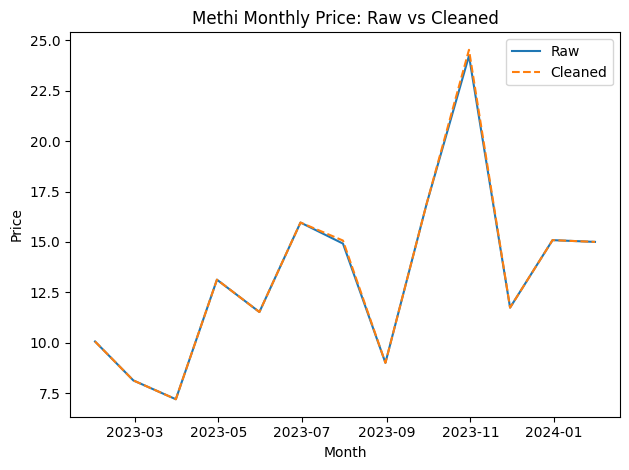

In [76]:
# --- Fix Methi outliers (IQR rule) ---
Q1, Q3 = df["Methi"].quantile([0.25, 0.75])
IQR = Q3 - Q1
upper_iqr = Q3 + 1.5 * IQR       # ≈ 28 for this dataset

df["Methi_raw"] = df["Methi"]    # keep original for comparison
mask_extreme = df["Methi"] > upper_iqr
df.loc[mask_extreme, "Methi"] = np.nan

# Time-based interpolation on date index
df = df.set_index("Price Dates")
df["Methi"] = df["Methi"].interpolate(method="time").bfill().ffill()
df = df.reset_index()

# Save cleaned version (optional)
df.drop(columns=["Methi_raw"]).to_csv("prices_clean_methi.csv", index=False)

# --- Recompute monthly + quarterly decomposition stats (before/after) ---
monthly = df.set_index("Price Dates")[["Methi","Methi_raw"]].resample("M").mean()

def decomp_stats(series, period=3):
    s = series.asfreq("M").dropna()
    decomp = seasonal_decompose(s, model="additive", period=period)
    trend_var = np.var(decomp.trend.dropna())
    resid_var = np.var(decomp.resid.dropna())
    seasonal_amp = decomp.seasonal.max() - decomp.seasonal.min()
    return round(trend_var,2), round(seasonal_amp,2), round(resid_var,2)

stats_raw  = decomp_stats(monthly["Methi_raw"])
stats_clean= decomp_stats(monthly["Methi"])

print("Methi (raw)   - Trend_Var, Seasonal_Amp, Residual_Var:", stats_raw)
print("Methi (clean) - Trend_Var, Seasonal_Amp, Residual_Var:", stats_clean)

# Plot monthly raw vs cleaned
plt.plot(monthly.index, monthly["Methi_raw"], label="Raw")
plt.plot(monthly.index, monthly["Methi"], linestyle="--", label="Cleaned")
plt.title("Methi Monthly Price: Raw vs Cleaned")
plt.xlabel("Month"); plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [82]:
def rmse(y_true, y_pred):
    try:
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        return np.sqrt(mean_squared_error(y_true, y_pred))

results = []
for veg in num_cols:
    series = df.set_index("Price Dates")[veg].asfreq("D").interpolate()

    y = series.dropna()
    if len(y) < 50:
        print(f"Skipping {veg} (too few data points)")
        continue

    train_size = int(len(y) * 0.8)
    train, test = y.iloc[:train_size], y.iloc[train_size:]

    # 1) Naive
    naive_forecast = pd.Series(train.iloc[-1], index=test.index)
    mae_naive = mean_absolute_error(test, naive_forecast)
    rmse_naive = rmse(test, naive_forecast)

    # 2) ARIMA
    try:
        arima_fit = ARIMA(train, order=(3,1,2)).fit()
        forecast = arima_fit.forecast(steps=len(test))
        mae_arima = mean_absolute_error(test, forecast)
        rmse_arima = rmse(test, forecast)
    except Exception as e:
        print(f"ARIMA failed for {veg}: {e}")
        mae_arima, rmse_arima = np.nan, np.nan

    # 3) Lagged Regression
    df_feat = pd.DataFrame(series)
    for lag in [1, 7, 14]:
        df_feat[f"lag_{lag}"] = df_feat[veg].shift(lag)
    df_feat = df_feat.dropna()

    if df_feat.shape[0] > 20:
        X = df_feat.drop(columns=[veg])
        y_lr = df_feat[veg]
        X_train, X_test, y_train, y_test = train_test_split(X, y_lr, shuffle=False, test_size=0.2)

        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)

        mae_lr = mean_absolute_error(y_test, y_pred)
        rmse_lr = rmse(y_test, y_pred)
    else:
        mae_lr, rmse_lr = np.nan, np.nan

    results.append({
        "Vegetable": veg,
        "Naive_MAE": round(mae_naive,2), "Naive_RMSE": round(rmse_naive,2),
        "ARIMA_MAE": round(mae_arima,2), "ARIMA_RMSE": round(rmse_arima,2),
        "LR_MAE": round(mae_lr,2), "LR_RMSE": round(rmse_lr,2)
    })

results_df = pd.DataFrame(results).set_index("Vegetable")
display(results_df)

,Naive_MAE,Naive_RMSE,ARIMA_MAE,ARIMA_RMSE,LR_MAE,LR_RMSE
Vegetable,,,,,,
Bhindi (Ladies finger),9.73,12.88,9.12,11.93,2.68,3.85
Tomato,0.00,0.00,0.00,0.00,0.00,0.00
Onion,9.42,10.86,9.98,11.43,2.41,3.64
Potato,1.44,1.77,1.34,1.60,1.22,1.57
Brinjal,19.30,21.44,18.51,20.48,5.19,6.86
Garlic,62.43,77.52,62.43,77.52,3.99,8.47
Peas,60.11,71.34,58.13,69.39,5.31,8.93
Methi,12.80,14.15,12.96,14.30,1.42,2.42
Green Chilli,6.91,8.10,11.55,13.24,4.31,5.36


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [34]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [35]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [36]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [37]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
